<a href="https://colab.research.google.com/github/Breniah/HW_5/blob/main/lecture_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import sklearn
import tensorflow as tf
from textblob import TextBlob
import csv
from IPython.display import display, HTML
import wordcloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
html_content = """
<h3 align="center"> Sentiment Analysis in Banking and financial Services <h3>
<h2 align ="center"> Natural Language Processing <h2>
"""

display(HTML(html_content))
""

''

In [ ]:
#step # 1 is Corpus
html_content = """
<h2 align ="center"> 1. Corpus <h2>
"""
display(HTML(html_content))
""

''

In [ ]:
data = pd.read_csv('all-data.csv',encoding='iso-8859-1')


In [ ]:
#Print data
data.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
#Rename the column of dataset
data.columns=["sentiment", "news"]
data.head()

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
#printing the first 5 news of the dataset
for news in data['news'].iloc[0:5]:
  print("\n", news)


 Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .

 The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .

 With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .

 According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .

 FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed ci

In [ ]:
html_content = """
<h2 align ="center"> 2. Cleaning and Segmentation <h2>
"""
display(HTML(html_content))
""

''

In [ ]:
import pandas as pd # Ensure pandas is imported if not already in scope
from os.path import join

# Re-define data to ensure it's available and has correct columns,
# assuming this cell might be run out of order or after a kernel restart.
# This duplicates code from bdB1dDT4E19L and 6-OlV7rXJlpi to ensure this cell is self-contained.
data = pd.read_csv('all-data.csv',encoding='iso-8859-1')
data.columns=["sentiment", "news"]

#Turn all upercase words into lowercase and remove all special charaters and digits
data['news'] = data['news'].apply(lambda word:' '.join(word.lower() for word in word.split()))

#Remove all digits
data['news'] = data['news'].str.replace(r'\d+', ' ',regex=True)

#deleting special characters
data['news'] = data['news'].str.replace(r'\W', ' ',regex=True)

#print
data.head()

,sentiment,news
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company s updated strategy f...
4,positive,financing of aspocomp s growth aspocomp is ag...


In [ ]:
#removing stopword

stopwords_list = set(stopwords.words('english'))
data['news'] = data['news'].apply(lambda word: ' '. join([word for word in word.split() if word not in stopwords_list]))

#print
data.head()

,sentiment,news
0,neutral,technopolis plans develop stages area less squ...
1,negative,international electronic industry company elco...
2,positive,new production plant company would increase ca...
3,positive,according company updated strategy years baswa...
4,positive,financing aspocomp growth aspocomp aggressivel...


In [ ]:
for news in data['news'].iloc[0:5]:
  print("\n", news)


 technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said

 international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported

 new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability

 according company updated strategy years basware targets long term net sales growth range operating profit margin net sales

 financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs


 technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability according company updated strategy years basware targets long term net sales growth range operating profit margin net sales financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs last quarter componenta net sales doubled eur eur period year earlier moved zero pre tax profit pre tax loss eur third quarter net sales increased eur mn operating profit eur mn operating profit rose eur mn eur mn corresponding period represent

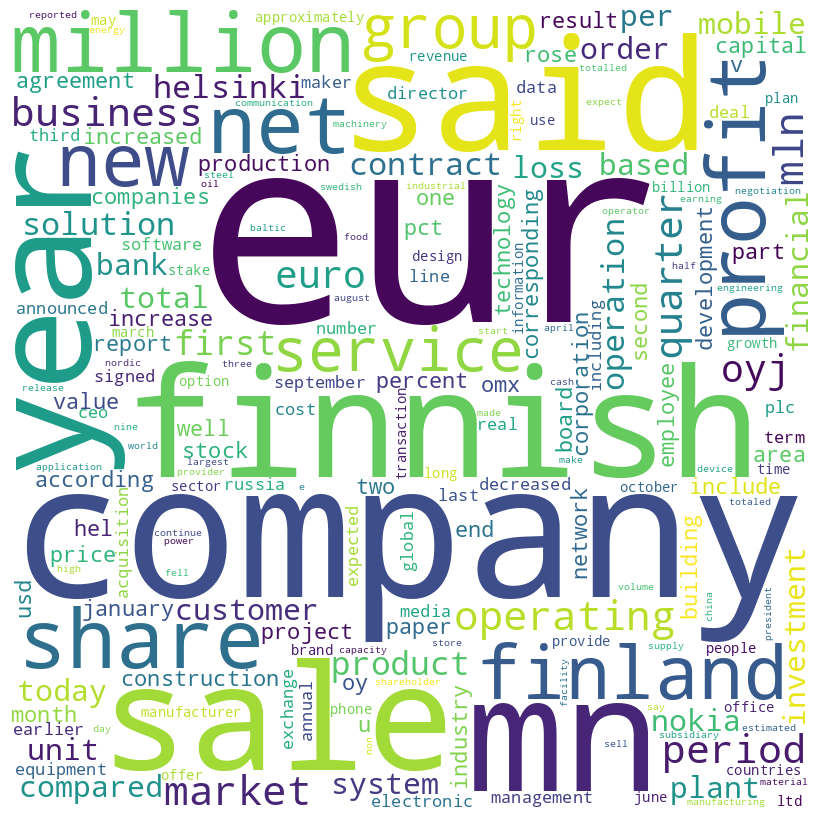

In [ ]:
#creating a cloud of words upon their frequency:

common_words = ' '

for i in data['news']:
  i = str(i)
  word = i.split()
  common_words += ' '.join(word)+" "
print(common_words)

wordcloud = wordcloud.WordCloud(width = 800, height = 800, background_color='white', min_font_size = 10, collocations=False).generate(common_words)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
html_content = """
<h2 align ="center"> 3-4. Tokenization and Vectorization <h2>
"""
display(HTML(html_content))
""

''

In [ ]:
#let breakdown each news into words: Need to import a tokenizer library and keras
#make a funtion for the tokenizer
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data['news'].values)
X = tokenizer.texts_to_sequences(data['news'].values)

#print the tokens and vectors
print("number of rows:{}\n number of columns:{}".format(len(X), len(X[0])))
X[0:5]

number of rows:4845
 number of columns:7


[[240, 114, 450, 65, 45, 451, 4],
 [192, 79, 2, 229, 94, 181, 82, 2, 169, 156],
 [15, 39, 49, 2, 72, 60, 170, 87, 60, 362, 72, 129, 404, 60, 39],
 [44, 2, 241, 162, 199, 134, 174, 8, 6, 118, 263, 13, 9, 390, 8, 6],
 [430, 118, 430, 118, 241]]

In [ ]:
#length of the tokenization is not even. lets set each text with the same length
X= pad_sequences(X)
print("number of rows:{}\n number of columns:{}".format(len(X), len(X[0])))
X[0:5]



number of rows:4845
 number of columns:31


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240, 114,
        450,  65,  45, 451,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 192,  79,   2, 229,  94,
        181,  82,   2, 169, 156],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  15,  39,  49,   2,  72,  60, 170,  87,  60, 362,
         72, 129, 404,  60,  39],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  44,   2, 241, 162, 199, 134, 174,   8,   6, 118, 263,
         13,   9, 390,   8,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        430, 118, 430, 118, 241]], dtype=int32)

In [ ]:
html_content = """
<h2 align ="center"> 5. Embedding <h2>
"""
display(HTML(html_content))
""

''